In [1]:
from data import *
import json
import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
def get_truth_tracks(hits_by_layers):
    tracks = dict()
    for l, hp in hits_by_layers.items():
        for i in range(len(hp)):
            id = hp[i].hit_id
            particle_id = hp[i].particle_id
            if particle_id not in tracks:
                tracks[particle_id] = [hp[i]]
            else:
                tracks[particle_id] += [hp[i]]
    for t, h in tracks.items():
        h = sorted(h, key=lambda obj: obj.z)
        tracks[t] = h
    return tracks

In [3]:
def get_angles(tracks):
    angles = []
    for pa, hs in tracks.items():
        for i in range(len(hs)-2):
            h_i = hs[i]
            h_j = hs[i+1]
            h_k = hs[i+2]
            seg_1 = Segment(h_i, h_j)
            seg_2 = Segment(h_j, h_k)
            c = Cost(seg_1, seg_2)
            cos_beta = c.cos_beta
            angles.append(np.arccos(cos_beta))
    return angles

In [4]:
def display(hits, segments):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    layers = list(hits.keys())
    xs = []
    ys = []
    zs = []

    for p in layers:
        h_p = hits[p]
        for h in h_p:
            xs.append(h.x)
            ys.append(h.y)
            zs.append(h.z)
    ax.scatter(xs, ys, zs, marker='o', color='red')

    for track, hits in segments.items():
        for i in range(len(hits)-1):
            h1 = hits[i]
            h2 = hits[i+1]
            ax.plot(xs=[h1.x, h2.x], ys=[h1.y, h2.y], zs=[h1.z, h2.z], color='blue')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

In [5]:
def run_script(no_tracks, bin_width):
    src_path = '../../src/data_selected'
    folder = '/'+ str(no_tracks)+'hits/known_track/'
    data_path = src_path + folder + 'hits.csv'
    
    print("Loading data...")
    hits_by_layers, hits = read_hits(data_path)
    print("Loaded data!")

    tracks =  get_truth_tracks(hits_by_layers)

    # display(hits_by_layers, tracks)

    angles = get_angles(tracks)

    print("Min beta = ", min(angles))
    print("Max beta = ", max(angles))
    print("A:", math.pi/max(angles))

    plt.clf()
      # Define the width of each bin
    bins = [i * bin_width for i in range(int(min(angles) / bin_width), int(max(angles) / bin_width) + 2)]
    counts, bins, patches = plt.hist(angles, bins=bins, edgecolor='black')
    
    # Adding labels and title
    plt.xlabel('Beta angle')
    plt.ylabel('Frequency')
    plt.title('Interval Bar Plot with Beta angles')
    # Adding the frequency counts above each bar
    for count, bin_edge in zip(counts, bins):
        plt.text(bin_edge + bin_width / 2, count, str(int(count)), ha='center', va='bottom')
    
    # Find the bin with the highest count
    max_count = max(counts)
    max_index = counts.tolist().index(max_count)
    max_bin_value = bins[max_index]
    # Print the value of the bar that has the highest count
    print(f"The value of the bar with the highest count is: {max_bin_value} with a count of {max_count}")
    plt.show()
    print("B:", math.pi/max_bin_value)

Loading data...
Loaded data!
Min beta =  0.0
Max beta =  0.009613742836835474
A: 326.7814322588955
The value of the bar with the highest count is: 0.0007 with a count of 151.0


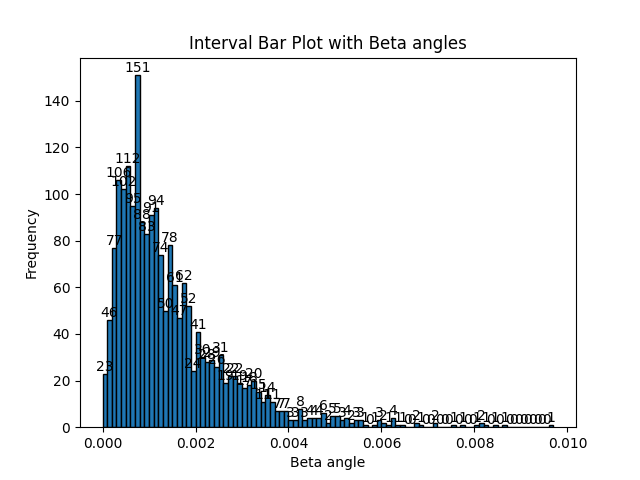

B: 4487.989505128276


In [7]:
no_tracks = 400
bin_width = 0.0001
run_script(no_tracks, bin_width)

In [8]:
plt.close()